# Feature engineering using clustering methods

#### Description:

This codebook covers how to perform feature engineering using clustering methods.

#### Skill level:

- Advanced

### Import the required libraries
-------------------------

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/pokemon.csv'))

### Inspect the dataframe
-------------------------

In [4]:
df_raw.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


### Collect some common statistics for each numeric column of the dataframe
-------------------------

In [5]:
df_raw.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### Make a copy of the dataframe with only numeric columns
-------------------------

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df_raw.select_dtypes(include=numerics)

### Generate a scatter plot for two variables
-------------------------

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

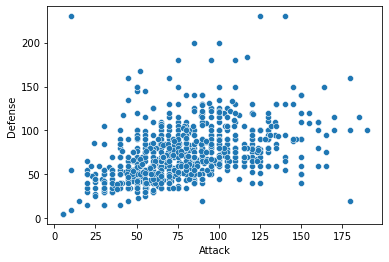

In [7]:
sns.scatterplot(data=df_numeric, x='Attack', y='Defense')

### Check the Silhouette and NMI scores for various cluster counts
-------------------------

In [8]:
df_data = df_numeric[['Attack', 'Defense']]

range_n_clusters = range(2, 14)

df_kmeans = pd.DataFrame(columns=['cluster_count', 'score', 'method'])

for n_clusters in range_n_clusters:
    for i in range(0, 5):
        clusterer = KMeans(n_clusters=n_clusters).fit(df_data)
        cluster_labels = clusterer.labels_

        silhouette_avg = silhouette_score(df_data, cluster_labels, sample_size=3000)
        nmi = normalized_mutual_info_score(df_numeric['Total'].values, cluster_labels)
        
        df_kmeans.loc[len(df_kmeans.index)] = [n_clusters, silhouette_avg, 'silhouette']
        df_kmeans.loc[len(df_kmeans.index)] = [n_clusters, nmi, 'nmi']

<AxesSubplot:xlabel='cluster_count', ylabel='score'>

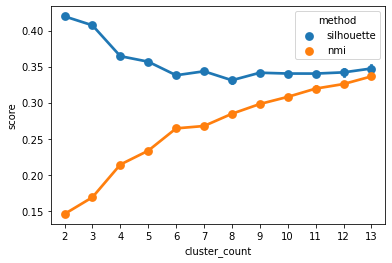

In [9]:
sns.pointplot(data=df_kmeans, x='cluster_count', y='score', hue='method')

### Apply k-means clustering method using two clusters (k=2)
-------------------------

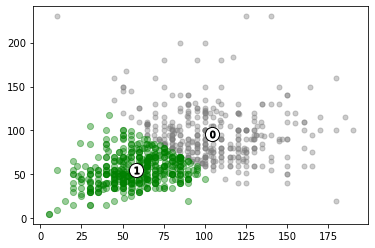

In [10]:
df_data = df_numeric[['Attack', 'Defense']]

clusterer = KMeans(n_clusters=2).fit(df_data)

cluster_labels = clusterer.labels_
       
scatter_x = np.array(df_data['Attack'].values)
scatter_y = np.array(df_data['Defense'].values)

dict_label = {0: '0', 1: '1'}
dict_colors = {0: 'grey', 1: 'green'}
dict_size = {0: 100, 1: 150}

fig, ax = plt.subplots()

for c in np.unique(cluster_labels):
    ix = np.where(cluster_labels == c)
    ax.scatter(scatter_x[ix], scatter_y[ix], 
               marker='.', s=dict_size[c], alpha=0.4, c=dict_colors[c], label=dict_label[c])

cluster_centers = clusterer.cluster_centers_

ix_x = df_data.columns.get_loc('Attack')
ix_y = df_data.columns.get_loc('Defense')

ax.scatter(cluster_centers[:, ix_x], cluster_centers[:, ix_y], 
           marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(cluster_centers):
    ax.scatter(c[ix_x], c[ix_y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

### Fit the k-means clustering model to the two variables and extract the cluster labels
-------------------------

In [11]:
df_data = df_numeric[['Attack', 'Defense']].copy()

clusterer = KMeans(n_clusters=2).fit(df_data)

cluster_labels = clusterer.labels_

df_data.loc[:, 'cluster_labels'] = cluster_labels

In [12]:
df_data.head()

,Attack,Defense,cluster_labels
0,49,49,0
1,62,63,0
2,82,83,1
3,100,123,1
4,52,43,0
